In [7]:
import pandas as pd

df = pd.read_csv("../data/raw_analyst_ratings.csv")

df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [8]:
# ---------------------------------------
# Basic Dataset Exploration
# ---------------------------------------

# Display first few rows
print("🔹 First 5 rows:")
display(df.head())

# Dataset shape
print("\n🔹 Shape of dataset:")
print(df.shape)

# Columns
print("\n🔹 Columns:")
print(df.columns)

# Data types
print("\n🔹 Data types:")
print(df.dtypes)

# Summary statistics for numeric columns
print("\n🔹 Summary statistics:")
display(df.describe())

# Check missing values
print("\n🔹 Missing values:")
print(df.isna().sum())


🔹 First 5 rows:


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A



🔹 Shape of dataset:
(1407328, 6)

🔹 Columns:
Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

🔹 Data types:
Unnamed: 0     int64
headline      object
url           object
publisher     object
date          object
stock         object
dtype: object

🔹 Summary statistics:


,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06



🔹 Missing values:
Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


In [9]:
df = df.drop(columns=["Unnamed: 0"], errors="ignore")
df.head()


,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


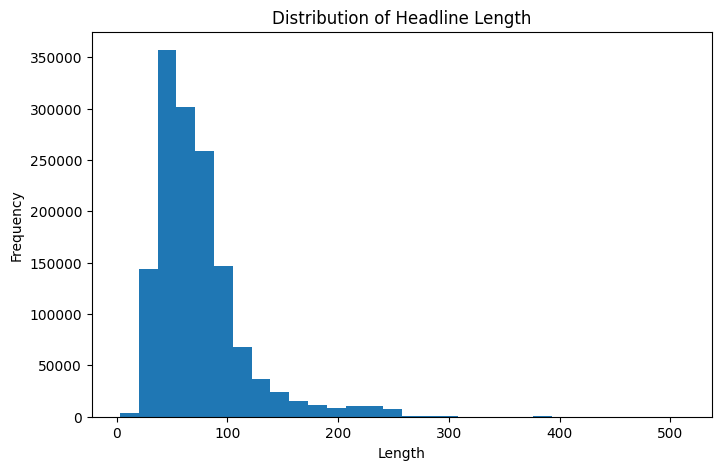

In [10]:
import matplotlib.pyplot as plt

df["text_length"] = df["headline"].astype(str).apply(len)

plt.figure(figsize=(8,5))
plt.hist(df["text_length"], bins=30)
plt.title("Distribution of Headline Length")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()


In [11]:
from collections import Counter
import re

# Combine all headlines into one string
all_text = " ".join(df["headline"].astype(str).tolist())

# Remove punctuation and lowercase
cleaned = re.sub(r"[^a-zA-Z ]", "", all_text).lower()

words = cleaned.split()
word_counts = Counter(words)

# Show top 20 words
word_counts.most_common(20)


[('to', 402906),
 ('of', 269814),
 ('on', 245082),
 ('for', 239535),
 ('in', 220612),
 ('the', 212863),
 ('m', 186060),
 ('vs', 162147),
 ('stocks', 161868),
 ('q', 157878),
 ('est', 140606),
 ('eps', 128929),
 ('from', 120713),
 ('shares', 114209),
 ('and', 113439),
 ('reports', 108707),
 ('update', 91680),
 ('market', 90880),
 ('earnings', 87185),
 ('with', 84204)]

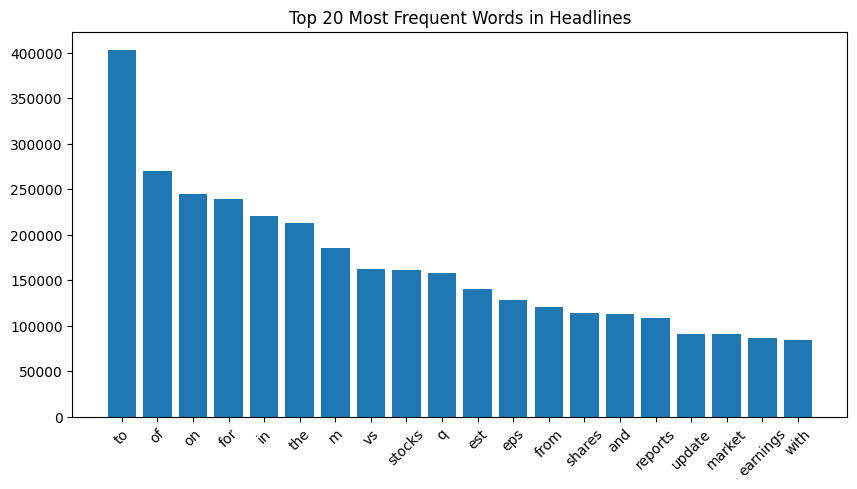

In [12]:
top_words = dict(word_counts.most_common(20))

plt.figure(figsize=(10,5))
plt.bar(top_words.keys(), top_words.values())
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Headlines")
plt.show()
